In [1]:
#request image prediction file 
#import needed libraries
import requests
import os
import csv
import pandas as pd
import numpy as np
import re
import json
import datetime
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime
% matplotlib inline 
#input url address
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)
#save file as tsv in the environment 
with open('image-predictions.tsv', 'w') as f:
    writer = csv.writer(f)
    reader = csv.reader(r.text.splitlines())

    for row in reader:
        writer.writerow(row)

In [2]:
#read tsv file to dataframe 
predic = pd.read_csv('image-predictions.tsv', sep = "\t", header = 0)
predic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [3]:
predic.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [4]:
predic.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [76]:
#read tweet archive
tweets = pd.read_csv("twitter-archive-enhanced.csv")
tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

***Define***
<br\>
Convert timestamp column and retweeted_status_timestamp column to datetime with datetime strptime.

***Code***

In [78]:
#quality issue 1--data type: timestamp is object, need to convert it to datatime 
tweets['timestamp'] = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S %z') for x in tweets['timestamp']]

***Test***

In [82]:
tweets['timestamp']

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
5      2017-07-29 00:08:17+00:00
6      2017-07-28 16:27:12+00:00
7      2017-07-28 00:22:40+00:00
8      2017-07-27 16:25:51+00:00
9      2017-07-26 15:59:51+00:00
10     2017-07-26 00:31:25+00:00
11     2017-07-25 16:11:53+00:00
12     2017-07-25 01:55:32+00:00
13     2017-07-25 00:10:02+00:00
14     2017-07-24 17:02:04+00:00
15     2017-07-24 00:19:32+00:00
16     2017-07-23 00:22:39+00:00
17     2017-07-22 16:56:37+00:00
18     2017-07-22 00:23:06+00:00
19     2017-07-21 01:02:36+00:00
20     2017-07-20 16:49:33+00:00
21     2017-07-19 16:06:48+00:00
22     2017-07-19 03:39:09+00:00
23     2017-07-19 00:47:34+00:00
24     2017-07-18 16:08:03+00:00
25     2017-07-18 00:07:08+00:00
26     2017-07-17 16:17:36+00:00
27     2017-07-16 23:58:41+00:00
28     2017-07-16 20:14:00+00:00
29     2017-07-15 23:25:31+00:00
          

***Define***
<br\>
Replace all missing values with 0 using pandas replace. 

***Code***

In [83]:
#quality issue 2 --replace all missig values with 0 
tweets=tweets.replace(np.nan, 0)

***Test***

In [84]:
tweets.isna().sum()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

***Define***
<br\>
Convert certain factor variables to numeric variables using pandas to_numeric. 

***Code***

In [85]:
#quality issue 1--data type: in_reply_to_status_Id, in_reply_to_user_Id, retweeted_status_id, retweeted_status_user_id
tweets['in_reply_to_status_id'] = tweets.in_reply_to_status_id.astype(int)
tweets['in_reply_to_user_id'] = pd.to_numeric(tweets['in_reply_to_user_id'], downcast='signed')
tweets['retweeted_status_id'] = pd.to_numeric(tweets['retweeted_status_id'], downcast='signed')
tweets['retweeted_status_user_id'] = pd.to_numeric(tweets['retweeted_status_user_id'], downcast='signed')

***Test***

In [86]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null int32
in_reply_to_user_id           2356 non-null int64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null int64
retweeted_status_user_id      2356 non-null int64
retweeted_status_timestamp    2356 non-null object
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[n

***Define***
<br\>
Remove "a herf =" from each source using string slicing. 

***Code***

In [87]:
#quality issue 3--source should only contains website
tweets['source'] = tweets['source'].str.split('"', ).str[1]

***Test***

In [88]:
tweets['source'].head()

0    http://twitter.com/download/iphone
1    http://twitter.com/download/iphone
2    http://twitter.com/download/iphone
3    http://twitter.com/download/iphone
4    http://twitter.com/download/iphone
Name: source, dtype: object

In [89]:
len(tweets['puppo'])

2356

In [90]:
l = tweets['text'].str.strip().tolist()
l

["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
 'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ',
 'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f',
 "Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh",
 'Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps:

In [91]:
len(l)

2356

***Define***
<br\>
Remove all https links from the tweet text using substract in re. 

***Code***

In [92]:
#remove all https
l_text = []
for elem in l:
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', elem)
    l_text.append(text)
l_text

["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 ",
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 ",
 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 ',
 'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us ',
 'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek ',
 "Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek ",
 'Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\n ',
 "When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 ",
 "This is Zoey. 

***Test***

In [93]:
l_text[1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 "

In [94]:
len(l_text)

2356

***Define***
<br\>
Extract rating numerator from each rating using re.search and re.findall. 

***Code***

In [95]:
#extract correct rating numerator 
pattern = re.compile(r' \d{1,3}')
list_text = []
for elem in l_text:
    match = pattern.search(elem)   
    if match:
        rating = pattern.findall(elem)
        list_text.append(rating[0][:3].strip())
    else: 
        list_text.append(0)
list_text

['13',
 '13',
 '12',
 '13',
 '12',
 '13',
 '13',
 '13',
 '13',
 '14',
 '13',
 '13',
 '13',
 '12',
 '13',
 '13',
 '12',
 '13',
 '13',
 '13',
 '12',
 '13',
 '14',
 '13',
 '13',
 '12',
 '13',
 '13',
 '13',
 '12',
 '12',
 '13',
 '12',
 '12',
 '13',
 '14',
 '13',
 '13',
 '12',
 '13',
 '13',
 '14',
 '13',
 '12',
 '12',
 '13',
 '13',
 '13',
 '13',
 '12',
 '13',
 '13',
 '13',
 '12',
 '13',
 '17',
 '14',
 '12',
 '13',
 '12',
 '12',
 '12',
 '11',
 '13',
 '14',
 '12',
 '13',
 '12',
 '14',
 '11',
 '13',
 '13',
 '13',
 '13',
 '11',
 '13',
 '14',
 '13',
 '14',
 '12',
 '13',
 '12',
 '12',
 '14',
 '13',
 '13',
 '13',
 '13',
 '13',
 '12',
 '12',
 '12',
 '13',
 '12',
 '13',
 '14',
 '13',
 '12',
 '12',
 '12',
 '13',
 '14',
 '13',
 '12',
 '13',
 '12',
 '13',
 '12',
 '12',
 '12',
 '14',
 '13',
 '11',
 0,
 '13',
 '13',
 '13',
 '14',
 '12',
 '13',
 '13',
 '12',
 '13',
 '14',
 '12',
 '13',
 '12',
 '12',
 '13',
 '12',
 '13',
 '13',
 '13',
 '13',
 '12',
 '13',
 '12',
 '12',
 '13',
 '13',
 '13',
 '14',
 '12',
 '

***Test***

In [96]:
print(l_text[10], list_text[10])

This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek  13


In [97]:
len(list_text)

2356

***Define***
<br\>
Convert strings to integer using a self-defined function

***Code***

In [98]:
#convert strings to integer 

def convert_to_int(lists):
  return [int(el) if not isinstance(el,list) else convert_to_int(el) for el in lists]
correct = convert_to_int(list_text)
tweets['correct_rating'] = correct

***Test***

In [99]:
tweets['correct_rating'].describe()

count    2356.000000
mean       10.867572
std         6.236550
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        98.000000
Name: correct_rating, dtype: float64

In [100]:
tweets.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,correct_rating
0,892420643555336193,0,0,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,0,0,0,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,13
1,892177421306343426,0,0,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,0,0,0,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,13
2,891815181378084864,0,0,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,0,0,0,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,12
3,891689557279858688,0,0,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,0,0,0,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,13
4,891327558926688256,0,0,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,0,0,0,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,12


***Define***
<br\>
Extract name from each tweet text using re.search, re.findall and re.compile.

***Code***

In [101]:
#quality issue 4--names of dogs are not all correct, solution--extract names from tweets text
pattern = re.compile(r" [A-Z][a-z]{3,10}")
names = []
for elem in l_text: 
    match = pattern.search(elem)
    if match:
        name = pattern.findall(elem)
        names.append(name[0].strip())
    else:
        names.append('None')
names

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'South',
 'None',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Sometimes',
 'Stuart',
 'Oliver',
 'Taught',
 'Zeke',
 'Ralphus',
 'This',
 'Gerald',
 'Jeffrey',
 'Venezuelan',
 'Canela',
 'None',
 'Jubilant',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'None',
 'Waffles',
 'None',
 'This',
 'Maisey',
 'Howard',
 'This',
 'Pawbably',
 'Earl',
 'Lola',
 'Kevin',
 'Extremely',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'Thank',
 'Rusty',
 'Already',
 'Stanley',
 'Alfy',
 'Koko',
 'Benebop',
 'Gary',
 'These',
 'Zooming',
 'Elliot',
 'Louis',
 'Please',
 'Bella',
 'Jesse',
 'Insubordina',
 'Romeo',
 'None',
 'Bailey',
 'Duddles',
 'Jack',
 'This',
 'Steven',
 'Beau',
 'Snoopy',
 'None',
 'Meet',
 'Meet',
 'Shadow',
 'Emmy',
 'Suspicions',
 'None',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'None',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'None',
 'Cash',
 'This',
 'Knows',
 'This',
 'Sebastian',
 'Thi

***Test***

In [102]:
print(l_text[12], names[12])

Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10  None


In [103]:
tweets['Correct_Name'] = names

***Define***
<br\>
Extract dog stage from each tweet text using a for loop

***Code***

In [104]:
if 'doggo' in l_text[9]:
    dog_stage = 'doggo'
else: 
    dog_stage = 'NA'
dog_stage

'doggo'

In [105]:
#quality issue 5 -- incorrect dog stage, solution: extract dog stage from tweet text 
Doggo = []
Pupper = []
Puppo = []
Blep = []
Snoot = []
Floof = []
for elem in l_text:
    if 'doggo' in elem:
        Doggo.append('doggo') 
    else: 
        
        Doggo.append('NA')
       
Doggo

['NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'doggo',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'doggo',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'doggo',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'doggo',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'doggo',
 'NA',
 'doggo',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'doggo',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',

In [106]:
len(Doggo)

2356

In [107]:
for elem in l_text:
    if 'pupper' in elem:
        Pupper.append('pupper')
    else: 
        Pupper.append('NA')
    if 'puppo' in elem: 
        Puppo.append('puppo')
    else: 
         Puppo.append('NA')
    if 'blep' in elem:
        Blep.append('blep')
    else:
        Blep.append('NA')
    if 'snoot' in elem: 
        Snoot.append('snoot')
    else: 
        Snoot.append('NA')
    if 'floof' in elem: 
        Floof.append('floof')
    else:
        Floof.append('NA')
         
       
        
        

***Test***

In [108]:
print(l_text[18], Floof[18])

This is Ralphus. He's powering up. Attempting maximum borkdrive. 13/10 inspirational af  NA


In [109]:
len(Floof)

2356

In [110]:

tweets['Doggo'] = Doggo
tweets['Pupper'] = Pupper
tweets['Puppo'] = Puppo 
tweets['Blep'] = Blep
tweets['Snoot'] = Snoot
tweets['Floof'] = Floof


***Define***
<br\>
Remove incorrect rating using pandas loc. 

***Code***

In [111]:
#quality issue 6--incorrect rating 
#identify rating of 0 and remove those rows 
tweets = tweets.loc[tweets['rating_numerator'] > 0]


***Test***

In [112]:
tweets[tweets['rating_numerator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,pupper,puppo,correct_rating,Correct_Name,Doggo,Pupper,Puppo,Blep,Snoot,Floof


In [113]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id                      2354 non-null int64
in_reply_to_status_id         2354 non-null int32
in_reply_to_user_id           2354 non-null int64
timestamp                     2354 non-null datetime64[ns, UTC]
source                        2354 non-null object
text                          2354 non-null object
retweeted_status_id           2354 non-null int64
retweeted_status_user_id      2354 non-null int64
retweeted_status_timestamp    2354 non-null object
expanded_urls                 2354 non-null object
rating_numerator              2354 non-null int64
rating_denominator            2354 non-null int64
name                          2354 non-null object
doggo                         2354 non-null object
floofer                       2354 non-null object
pupper                        2354 non-null object
puppo                         2354 non-null object
correct_rating      

***Define***
<br\>
Remove retweeted tweets using pandas

***Code***

In [114]:
#quality issue 7-- some tweets are not the original tweets--solution: remove rows where the tweet is a retweet
tweets = tweets[tweets['in_reply_to_status_id']==0]

***Test***

In [115]:
tweets[tweets['in_reply_to_status_id'] > 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,pupper,puppo,correct_rating,Correct_Name,Doggo,Pupper,Puppo,Blep,Snoot,Floof


In [116]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2277 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id                      2277 non-null int64
in_reply_to_status_id         2277 non-null int32
in_reply_to_user_id           2277 non-null int64
timestamp                     2277 non-null datetime64[ns, UTC]
source                        2277 non-null object
text                          2277 non-null object
retweeted_status_id           2277 non-null int64
retweeted_status_user_id      2277 non-null int64
retweeted_status_timestamp    2277 non-null object
expanded_urls                 2277 non-null object
rating_numerator              2277 non-null int64
rating_denominator            2277 non-null int64
name                          2277 non-null object
doggo                         2277 non-null object
floofer                       2277 non-null object
pupper                        2277 non-null object
puppo                         2277 non-null object
correct_rating      

***Define***
<br\>
Remove all tweets that are retweets of the original tweets using pandas



***Code***

In [117]:
#quality issue 8: remove rows where the tweet is a retweet of the orignial tweet
tweets=tweets[tweets['retweeted_status_id']==0]

***Test***

In [118]:
tweets['retweeted_status_id'].describe()

count    2096.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: retweeted_status_id, dtype: float64

***Define***
<br\>
Correct all rating denominator to 10 using pandas

***Code***

In [119]:
#quality issue 9: correct all rating denominator 
tweets['rating_denominator'] = 10

***Test***

In [120]:
tweets['rating_denominator'].describe()

count    2096.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

In [121]:
tweets['timestamp'].isnull().sum()

0

***Define***
<br\>
Extract year, month, day and hour from timestamp using a for loop.

***Code***

In [122]:
#Tidyness issue 1--extract year, month, day and hour from timestamp
time_1 = tweets['timestamp']
Month = []
Day = []
Year = []
Hour = []
Weekday = []
for i in time_1: 
    Year.append(i.year)
    Month.append(i.month)
    Day.append(i.day)
    Hour.append(i.hour)
    Weekday.append(i.isoweekday())
print(len(Year), len(Month), len(Day), len(Hour), len(Weekday))

2096 2096 2096 2096 2096


***Test***

In [123]:
len(tweets['timestamp'])

2096

In [124]:
print(tweets['timestamp'][132], Year[132], Month[132], Day[132], Hour[132], Weekday[132])

2017-05-07 18:36:02+00:00 2017 5 7 18 7


In [125]:
print(tweets['timestamp'][116], Year[116], Month[116], Day[116], Hour[116], Weekday[116])

2017-05-21 16:48:45+00:00 2017 5 21 16 7


In [126]:
tweets['Year']=Year
tweets['Month']=Month
tweets['Day']=Day
tweets['Hour']=Hour
tweets['Weekday']=Weekday

In [127]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2096 non-null int64
in_reply_to_status_id         2096 non-null int32
in_reply_to_user_id           2096 non-null int64
timestamp                     2096 non-null datetime64[ns, UTC]
source                        2096 non-null object
text                          2096 non-null object
retweeted_status_id           2096 non-null int64
retweeted_status_user_id      2096 non-null int64
retweeted_status_timestamp    2096 non-null object
expanded_urls                 2096 non-null object
rating_numerator              2096 non-null int64
rating_denominator            2096 non-null int64
name                          2096 non-null object
doggo                         2096 non-null object
floofer                       2096 non-null object
pupper                        2096 non-null object
puppo                         2096 non-null object
correct_rating      

In [128]:
#remove unused columns from the dataframe 
tweets = tweets.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
        'retweeted_status_timestamp', 'rating_numerator', 'expanded_urls', 'timestamp', 'source', 'doggo', 'floofer', 
                               'pupper', 'puppo'])


***Define***
<br\>
Remove tweet ids that have no images using pandas merge.

***Code***

In [129]:
#tidy issue 2--merge tweet rating data with image data, only include those ids with images 
left = tweets
right = predic
df = pd.merge(left, right, how = 'left', on = 'tweet_id')

In [130]:
#Tidy issue 2 -- some IDs don't have images and will need to be removed
df = df.dropna()

***Test***

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2095
Data columns (total 28 columns):
tweet_id              1970 non-null int64
text                  1970 non-null object
rating_denominator    1970 non-null int64
name                  1970 non-null object
correct_rating        1970 non-null int64
Correct_Name          1970 non-null object
Doggo                 1970 non-null object
Pupper                1970 non-null object
Puppo                 1970 non-null object
Blep                  1970 non-null object
Snoot                 1970 non-null object
Floof                 1970 non-null object
Year                  1970 non-null int64
Month                 1970 non-null int64
Day                   1970 non-null int64
Hour                  1970 non-null int64
Weekday               1970 non-null int64
jpg_url               1970 non-null object
img_num               1970 non-null float64
p1                    1970 non-null object
p1_conf               1970 non-null floa

In [132]:
#get tweeter ids 
ids = df['tweet_id']
ids.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: int64

In [343]:
#import needed libraries 
import tweepy
import time 
import sys
import json
from dateutil import parser
from datetime import datetime
consumer_key = 'KyuwwgX7HvGAJIbc1Z2KVuJcs'
consumer_secret = '9p5XqHj8phfXNcpLfY9cmpfO93mQCTs1ifQosmW3mnbNzKeF3J'
access_token = '182523169-FGoOOOJFC4sypFpMdWS89NVFI5Ey0rjs8wzxp8k5'
access_secret = 'k2P3EzY1XxoxEmuN2dyLefSGAv4hTaGBhKYCeaD1ZS8Ga'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, 
                wait_on_rate_limit = True, 
                wait_on_rate_limit_notify = True)
tweet = {}
tweet['Tweet'] = []
User_info = {}
User_info['Basic'] = []

#retrieve data from API 
for id in ids:
    period = datetime.strptime('Aug 1 2017', '%b %d %Y')
    try:
        tweet_t = api.get_status(id)
        tweeted_datetime = tweet_t.created_at
        if tweeted_datetime <= period:
            tweet['Tweet'].append({'User': id,
                    'Tweet_Text': tweet_t.text,
                    'Retweet_Count': tweet_t.retweet_count,
                    'Favorite_Count': tweet_t.favorite_count,
                    'Language': tweet_t.lang,
                    'Follower_Count': tweet_t.user.followers_count,
                    'Friends_Count' : tweet_t.user.friends_count,
                    'Listed_Count': tweet_t.user.listed_count,
                    'Time_Zone': tweet_t.user.time_zone})
            start = time.time()
            end = time.time()
            print(end-start)
    except tweepy.TweepError as e:
        print(e.args[0][0]['code'])  # prints 34
        print(e.args[0][0]['message'])  # prints 34



0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


Rate limit reached. Sleeping for: 621


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


Rate limit reached. Sleeping for: 627


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [344]:
type(tweet)

dict

In [345]:
with open('tweet_json.txt', 'w') as outfile: 
    json.dump(tweet, outfile)

In [133]:
#read json file 
with open('tweet_json.txt') as json_file:  
    data = json.load(json_file)
    tweet_file = []
    for tweet in data['Tweet']:
        tweet_file.append(tweet)

In [134]:
df_tweet_file = pd.DataFrame(tweet_file, columns = ['User', 'Tweet_Text', 'Retweet_Count', 'Favorite_Count', 'Language', 'Follower_Count', 
                                                   'Friends_Count', 'Listed_Count', 'Time_Zone'])

In [135]:
df_tweet_file.head()

,User,Tweet_Text,Retweet_Count,Favorite_Count,Language,Follower_Count,Friends_Count,Listed_Count,Time_Zone
0,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4223,25181,en,6232168,103,4075,None
1,891689557279858688,This is Darla. She commenced a snooze mid meal...,8769,42359,en,6232168,103,4075,None
2,891327558926688256,This is Franklin. He would like you to stop ca...,9535,40520,en,6232168,103,4075,None
3,891087950875897856,Here we have a majestic great white breaching ...,3163,20324,en,6232168,103,4075,None
4,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,2107,11916,en,6232168,103,4075,None


In [136]:
df_tweet_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 9 columns):
User              1968 non-null int64
Tweet_Text        1968 non-null object
Retweet_Count     1968 non-null int64
Favorite_Count    1968 non-null int64
Language          1968 non-null object
Follower_Count    1968 non-null int64
Friends_Count     1968 non-null int64
Listed_Count      1968 non-null int64
Time_Zone         0 non-null object
dtypes: int64(6), object(3)
memory usage: 138.5+ KB


In [137]:
#merge all three dataframes 
df_tweet_file['tweet_id'] = df_tweet_file['User']
left = df_tweet_file
right = df
tweets_master = pd.merge(left, right, how = 'left', on = 'tweet_id')

In [138]:
tweets_master.head()

,User,Tweet_Text,Retweet_Count,Favorite_Count,Language,Follower_Count,Friends_Count,Listed_Count,Time_Zone,tweet_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4223,25181,en,6232168,103,4075,None,891815181378084864,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
1,891689557279858688,This is Darla. She commenced a snooze mid meal...,8769,42359,en,6232168,103,4075,None,891689557279858688,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2,891327558926688256,This is Franklin. He would like you to stop ca...,9535,40520,en,6232168,103,4075,None,891327558926688256,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
3,891087950875897856,Here we have a majestic great white breaching ...,3163,20324,en,6232168,103,4075,None,891087950875897856,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
4,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,2107,11916,en,6232168,103,4075,None,890971913173991426,...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False


In [139]:
twitter_archive_master = pd.DataFrame()
tweets_master = tweets_master.drop(columns=['tweet_id', 'text'])
twitter_archive_master = tweets_master

In [140]:
twitter_archive_master = twitter_archive_master.drop(columns = ['name', 'Time_Zone'])

In [141]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 1967
Data columns (total 33 columns):
User                  1968 non-null int64
Tweet_Text            1968 non-null object
Retweet_Count         1968 non-null int64
Favorite_Count        1968 non-null int64
Language              1968 non-null object
Follower_Count        1968 non-null int64
Friends_Count         1968 non-null int64
Listed_Count          1968 non-null int64
rating_denominator    1968 non-null int64
correct_rating        1968 non-null int64
Correct_Name          1968 non-null object
Doggo                 1968 non-null object
Pupper                1968 non-null object
Puppo                 1968 non-null object
Blep                  1968 non-null object
Snoot                 1968 non-null object
Floof                 1968 non-null object
Year                  1968 non-null int64
Month                 1968 non-null int64
Day                   1968 non-null int64
Hour                  1968 non-null int64
We

In [142]:
#check for duplicates
twitter_archive_master.User.duplicated().sum()

0

In [143]:
#write dataframe to csv
twitter_archive_master.to_csv('twitter_archive_master.csv')

In [144]:
tweet_archive_master = pd.read_csv('twitter_archive_master.csv')

In [145]:
tweet_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 34 columns):
Unnamed: 0            1968 non-null int64
User                  1968 non-null int64
Tweet_Text            1968 non-null object
Retweet_Count         1968 non-null int64
Favorite_Count        1968 non-null int64
Language              1968 non-null object
Follower_Count        1968 non-null int64
Friends_Count         1968 non-null int64
Listed_Count          1968 non-null int64
rating_denominator    1968 non-null int64
correct_rating        1968 non-null int64
Correct_Name          1968 non-null object
Doggo                 75 non-null object
Pupper                225 non-null object
Puppo                 28 non-null object
Blep                  1 non-null object
Snoot                 0 non-null float64
Floof                 22 non-null object
Year                  1968 non-null int64
Month                 1968 non-null int64
Day                   1968 non-null int64
Hour          

In [146]:
tweet_archive_master.head()

,Unnamed: 0,User,Tweet_Text,Retweet_Count,Favorite_Count,Language,Follower_Count,Friends_Count,Listed_Count,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4223,25181,en,6232168,103,4075,10,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
1,1,891689557279858688,This is Darla. She commenced a snooze mid meal...,8769,42359,en,6232168,103,4075,10,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2,2,891327558926688256,This is Franklin. He would like you to stop ca...,9535,40520,en,6232168,103,4075,10,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
3,3,891087950875897856,Here we have a majestic great white breaching ...,3163,20324,en,6232168,103,4075,10,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
4,4,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,2107,11916,en,6232168,103,4075,10,...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False


In [147]:
tweet_archive_master.describe()

,Unnamed: 0,User,Retweet_Count,Favorite_Count,Follower_Count,Friends_Count,Listed_Count,rating_denominator,correct_rating,Snoot,Year,Month,Day,Hour,Weekday,img_num,p1_conf,p2_conf,p3_conf
count,1968.000000,1.968000e+03,1968.000000,1968.000000,1.968000e+03,1968.0,1968.000000,1968.0,1968.000000,0.0,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1.968000e+03,1.968000e+03
mean,983.500000,7.358327e+17,2751.228659,8914.534045,6.232341e+06,103.0,4097.272866,10.0,10.745427,NaN,2015.845528,7.167683,16.044207,9.732215,3.840955,1.201220,0.594759,1.346940e-01,6.017998e-02
std,568.256984,6.735826e+16,4750.062110,12656.004033,1.431271e+02,0.0,19.761188,0.0,6.211223,NaN,0.698259,4.118891,8.920685,8.627108,2.002695,0.557938,0.271904,1.010815e-01,5.096467e-02
min,0.000000,6.660209e+17,13.000000,80.000000,6.232071e+06,103.0,4075.000000,10.0,0.000000,NaN,2015.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,491.750000,6.758512e+17,614.000000,1946.500000,6.232208e+06,103.0,4078.000000,10.0,10.000000,NaN,2015.000000,3.000000,8.000000,1.000000,2.000000,1.000000,0.363268,5.345650e-02,1.609288e-02
50%,983.500000,7.087745e+17,1334.500000,4073.000000,6.232395e+06,103.0,4105.000000,10.0,11.000000,NaN,2016.000000,7.000000,16.000000,4.000000,4.000000,1.000000,0.587797,1.174550e-01,4.939645e-02
75%,1475.250000,7.877408e+17,3162.250000,11222.750000,6.232436e+06,103.0,4110.000000,10.0,12.000000,NaN,2016.000000,11.000000,24.000000,18.000000,6.000000,1.000000,0.847560,1.956673e-01,9.157912e-02
max,1967.000000,8.918152e+17,77886.000000,144059.000000,6.232650e+06,103.0,4167.000000,10.0,98.000000,NaN,2017.000000,12.000000,31.000000,23.000000,7.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [148]:
tweet_archive_master[tweet_archive_master['correct_rating']==98]['Tweet_Text']

441    This is Yogi. He's 98% floof. Snuggable af. 12...
Name: Tweet_Text, dtype: object

In [149]:
tweet_archive_master['Doggo'].describe()

count        75
unique        1
top       doggo
freq         75
Name: Doggo, dtype: object

In [150]:
tweet_archive_master['Pupper'].describe()

count        225
unique         1
top       pupper
freq         225
Name: Pupper, dtype: object

In [151]:
tweet_archive_master['Puppo'].describe()

count        28
unique        1
top       puppo
freq         28
Name: Puppo, dtype: object

In [152]:
tweet_archive_master['Blep'].describe()

count        1
unique       1
top       blep
freq         1
Name: Blep, dtype: object

In [153]:
tweet_archive_master['Snoot'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Snoot, dtype: float64

In [154]:
tweet_archive_master['Floof'].describe()

count        22
unique        1
top       floof
freq         22
Name: Floof, dtype: object

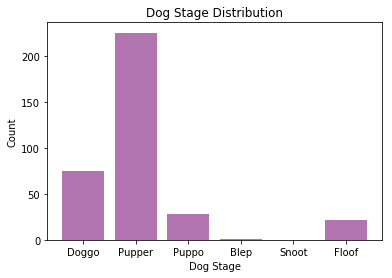

In [155]:

count = [75, 225, 28, 1, 0, 22]
stage = ['Doggo', 'Pupper', 'Puppo', 'Blep', 'Snoot', 'Floof']
y_pos = np.arange(len(stage))
plt.bar(range(len(stage)), count,  color = (0.5,0.1,0.5,0.6))
plt.xticks(range(len(stage)), stage)
plt.xlabel('Dog Stage')
plt.ylabel('Count')
plt.title('Dog Stage Distribution')
plt.show()

In [156]:
tweet_archive_master[tweet_archive_master['Weekday']==6].describe()

,Unnamed: 0,User,Retweet_Count,Favorite_Count,Follower_Count,Friends_Count,Listed_Count,rating_denominator,correct_rating,Snoot,Year,Month,Day,Hour,Weekday,img_num,p1_conf,p2_conf,p3_conf
count,248.000000,2.480000e+02,248.000000,248.000000,2.480000e+02,248.0,248.000000,248.0,248.000000,0.0,248.000000,248.000000,248.000000,248.000000,248.0,248.000000,248.000000,2.480000e+02,2.480000e+02
mean,996.165323,7.338770e+17,2938.532258,8977.330645,6.232341e+06,103.0,4096.987903,10.0,10.729839,NaN,2015.838710,7.068548,16.137097,10.060484,6.0,1.181452,0.603947,1.296269e-01,5.921700e-02
std,560.493190,6.655568e+16,7175.456159,15370.106162,1.370358e+02,0.0,19.057654,0.0,4.640475,NaN,0.689858,4.144082,8.967178,8.749805,0.0,0.512336,0.277967,9.975098e-02,4.823033e-02
min,2.000000,6.678613e+17,45.000000,218.000000,6.232168e+06,103.0,4075.000000,10.0,0.000000,NaN,2015.000000,1.000000,1.000000,0.000000,6.0,1.000000,0.063152,1.011300e-08,1.740170e-10
25%,542.750000,6.755292e+17,642.500000,1877.500000,6.232209e+06,103.0,4078.000000,10.0,10.000000,NaN,2015.000000,3.000000,8.750000,1.000000,6.0,1.000000,0.368462,4.623540e-02,1.716443e-02
50%,1003.500000,7.073680e+17,1155.000000,3758.000000,6.232395e+06,103.0,4105.500000,10.0,11.000000,NaN,2016.000000,7.000000,17.000000,5.000000,6.0,1.000000,0.610554,1.081330e-01,5.025780e-02
75%,1485.250000,7.784688e+17,2891.750000,10492.000000,6.232437e+06,103.0,4110.000000,10.0,12.000000,NaN,2016.000000,11.000000,24.000000,18.000000,6.0,1.000000,0.873385,1.975993e-01,8.638735e-02
max,1864.000000,8.913276e+17,77886.000000,144059.000000,6.232642e+06,103.0,4145.000000,10.0,61.000000,NaN,2017.000000,12.000000,31.000000,23.000000,6.0,4.000000,1.000000,4.605650e-01,2.031630e-01


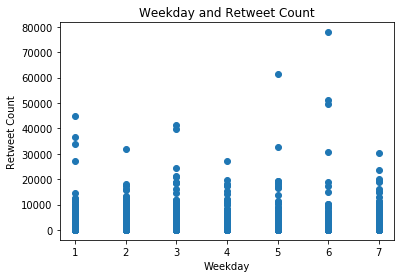

In [157]:
df=pd.read_csv('twitter_archive_master.csv')
plt.scatter(x= df['Weekday'], y = df['Retweet_Count'])
plt.xlabel('Weekday')
plt.ylabel('Retweet Count')
plt.title('Weekday and Retweet Count')
plt.show()

Model slope:     14.036569407553777
Model intercept: 2697.314823093649


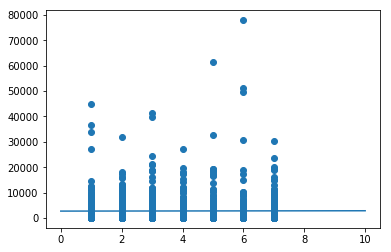

In [158]:
x = df['Weekday']
y = df['Retweet_Count']
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

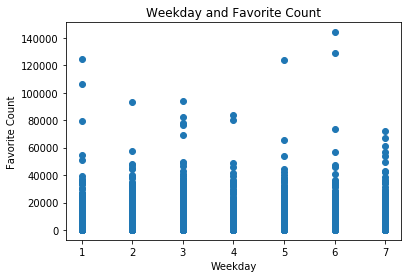

In [159]:
plt.scatter(x= df['Weekday'], y = df['Favorite_Count'])
plt.xlabel('Weekday')
plt.ylabel('Favorite Count')
plt.title('Weekday and Favorite Count')
plt.show()

Model slope:     -14.454262702722161
Model intercept: 8970.052221427783


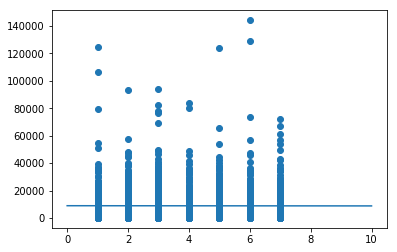

In [160]:
x = df['Weekday']
y = df['Favorite_Count']
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)